In [9]:
import pandas as pd


In [10]:
col_names = ['pregnant', 'glucose', 'bp', 'skin', 'insulin', 'bmi', 'pedigree', 'age', 'label']
pima = pd.read_csv('diabetes.csv', header=None, names=col_names)


In [11]:
pima = pima.drop(0).reset_index(drop=True)
pima.head()


,pregnant,glucose,bp,skin,insulin,bmi,pedigree,age,label
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [12]:
feature_cols = ['pregnant', 'insulin', 'bmi', 'age', 'glucose', 'bp', 'pedigree']

X = pima[feature_cols]
y = pima.label


In [13]:
from sklearn.model_selection import train_test_split


In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=16)


In [15]:
from sklearn.linear_model import LogisticRegression


In [16]:
logreg = LogisticRegression(random_state=16)
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)


c:\Users\acer\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [17]:
from sklearn import metrics


In [18]:
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix


array([[116,   9],
       [ 26,  41]], dtype=int64)

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


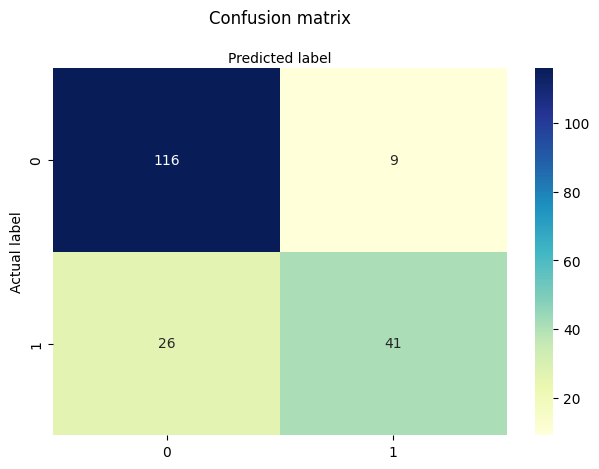

In [20]:
class_names = [0, 1]
fig,ax = plt.subplots()
tick_marks = np.arange(len(class_names))

plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)

sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap='YlGnBu', fmt='g')
ax.xaxis.set_label_position('top')

plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

plt.Text(0.5, 257.44, 'Predicted label')

plt.tight_layout()


In [21]:
from sklearn.metrics import classification_report


In [22]:
target_names = ['without diabetes', 'with diabetes']
print(classification_report(y_test, y_pred, target_names=target_names))


                  precision    recall  f1-score   support

without diabetes       0.82      0.93      0.87       125
   with diabetes       0.82      0.61      0.70        67

        accuracy                           0.82       192
       macro avg       0.82      0.77      0.78       192
    weighted avg       0.82      0.82      0.81       192



In [25]:
# ERROR
#y_pred_proba = logreg.predict_proba(X_test)[::, 1]
#fpr, tpr, _ = metrics.roc_curve(y_test, y_pred_proba)
#auc = metrics.roc_auc_score(y_test, y_pred_proba)

#plt.plot(fpr, tpr, label='data 1, auc=' + str(auc))
#plt.legend(loc=4)
